<a href="https://colab.research.google.com/github/amritha-dev/Smartphone_Sales_Analysis/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SMARTPHONES SALES IN INDIA -DATA ANALYSIS**





In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

 To read the csv file:

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datascience/project/Sales.csv')

Number of rows and columns:

In [ ]:
df.shape

(3114, 12)

3114 rows and 12 columns

In [ ]:
df.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


# Data Cleaning:

To check the null values:

In [ ]:

pd.isnull(df).sum()

Brands                   0
Models                   0
Colors                   0
Memory                  43
Storage                 39
Camera                   0
Rating                 144
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64

There are 43 null values in Memory Column,39 null values are found in Storage column and also 144 null values are found in column Rating

To drop the null values;

In [ ]:
df=df.dropna()

In [ ]:
df.shape

(2897, 12)

In [ ]:
pd.isnull(df).sum()

Brands                 0
Models                 0
Colors                 0
Memory                 0
Storage                0
Camera                 0
Rating                 0
Selling Price          0
Original Price         0
Mobile                 0
Discount               0
discount percentage    0
dtype: int64

All the null values are got dropped

In [ ]:
# Drop unneccessary columns:
df.columns

Index(['Brands', 'Models', 'Colors', 'Memory', 'Storage', 'Camera', 'Rating',
       'Selling Price', 'Original Price', 'Mobile', 'Discount',
       'discount percentage'],
      dtype='object')

In [ ]:
df.drop(['Models','Discount'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2897 entries, 0 to 3113
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               2897 non-null   object 
 1   Colors               2897 non-null   object 
 2   Memory               2897 non-null   object 
 3   Storage              2897 non-null   object 
 4   Camera               2897 non-null   object 
 5   Rating               2897 non-null   float64
 6   Selling Price        2897 non-null   int64  
 7   Original Price       2897 non-null   int64  
 8   Mobile               2897 non-null   object 
 9   discount percentage  2897 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 249.0+ KB


To describe the complete data in order to have general understanding about data (Count, Mean, std etc)

In [ ]:
df.describe()

,Rating,Selling Price,Original Price,discount percentage
count,2897.000000,2897.000000,2897.000000,2897.000000
mean,4.241319,24692.492233,26656.677943,6.222417
std,0.272841,26373.592602,28251.233298,11.353050
min,2.300000,1000.000000,1000.000000,-160.320641
25%,4.100000,9990.000000,10389.000000,0.000000
50%,4.300000,14999.000000,16300.000000,0.000000
75%,4.400000,27499.000000,29999.000000,9.836388
max,5.000000,179900.000000,189999.000000,70.610305


# Data analysis:

 Smartphone brands and their counts:

In [ ]:
df['Brands'].value_counts()


Brands
SAMSUNG         685
Apple           319
realme          281
OPPO            251
Xiaomi          191
Nokia           184
Infinix         151
GIONEE          127
Lenovo          120
vivo            114
ASUS            111
Motorola        103
LG               98
POCO             73
HTC              55
Google Pixel     29
IQOO              5
Name: count, dtype: int64

Top 10 rated smartphones in India :

In [ ]:
top_rated=df.sort_values(by=['Rating'],ascending=False)
top_rated=top_rated.head(10)
top_rated['Mobile']


1446                  vivo Z1x
1655              vivo X60 Pro
2634      Apple iPhone 7 Plus 
2242    SAMSUNG SM-B310EZDDINS
2483      Apple iPhone 7 Plus 
247                 vivo X50  
2879                   vivo S2
2006              Motorola G9 
1992           Nokia C20 Plus 
1994                realme 5i 
Name: Mobile, dtype: object

Grouping by memory in order to count how much ram memory generally prefer by customers:

In [ ]:
df['Brands'].groupby(df['Memory']).count().sort_values(ascending=False)

Memory
4 GB      711
3 GB      479
6 GB      444
2 GB      376
8 GB      326
1 GB      193
4GB       129
12 GB      58
512 MB     46
4 MB       37
1.5 GB     29
64 MB      15
32 MB      14
16 MB      12
8 MB       10
768 MB      6
10 MB       3
2 MB        2
46 MB       2
16 GB       1
153 MB      1
128 MB      1
100 MB      1
30 MB       1
Name: Brands, dtype: int64

Most chosen 10 colors by customers:

 Grouping by color in order to count which color is liked by people the most

In [ ]:
pref_colors=df['Colors'].groupby(df['Colors']).count().sort_values(ascending=False)
pref_colors.head(10)

Colors
Black             446
Gold              184
White             153
Blue              134
Silver             90
Red                76
Grey               43
Space Grey         36
Midnight Black     35
Rose Gold          28
Name: Colors, dtype: int64

leastly chosen 5 colors by customers:

In [ ]:
pref_colors.tail()

Colors
Grey / Silver      1
Grey               1
Gravity Black      1
Gold and Silver    1
midnight blue      1
Name: Colors, dtype: int64

# Data Visualization:

Selling price visualization by using histogram:

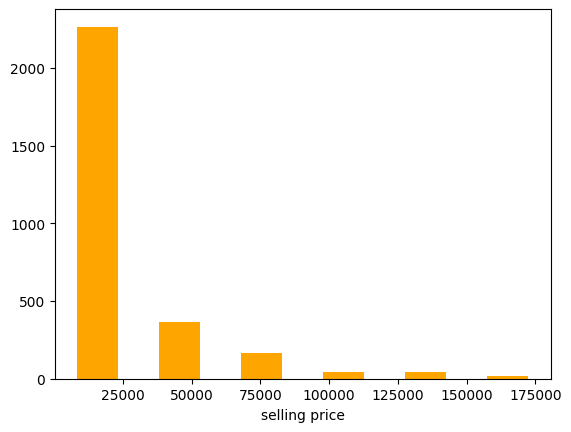

In [ ]:
# Histogram:
plt.xlabel('selling price')
sale=df['Selling Price']
plt.hist(sale,bins=6,rwidth=0.5,color=['orange'])
plt.show()

Visualization of Rating Column using violinplot in seaborn:





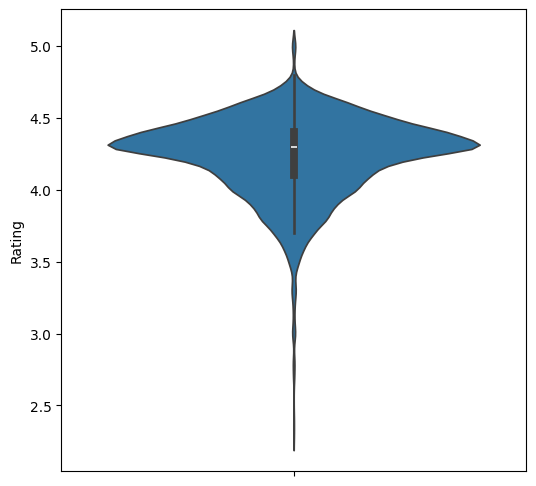

In [ ]:
# Violin plot:
fig, ax = plt.subplots(figsize=(6,6))
ax =sns.violinplot(df['Rating'])
plt.show()

To convert columns having float values into int:

In [ ]:
df['Rating'] = df['Rating'].astype(int)
df['discount percentage']=df['discount percentage'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2897 entries, 0 to 3113
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Brands               2897 non-null   object
 1   Colors               2897 non-null   object
 2   Memory               2897 non-null   object
 3   Storage              2897 non-null   object
 4   Camera               2897 non-null   object
 5   Rating               2897 non-null   int64 
 6   Selling Price        2897 non-null   int64 
 7   Original Price       2897 non-null   int64 
 8   Mobile               2897 non-null   object
 9   discount percentage  2897 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 249.0+ KB


Selling price and Original price using bar graph :

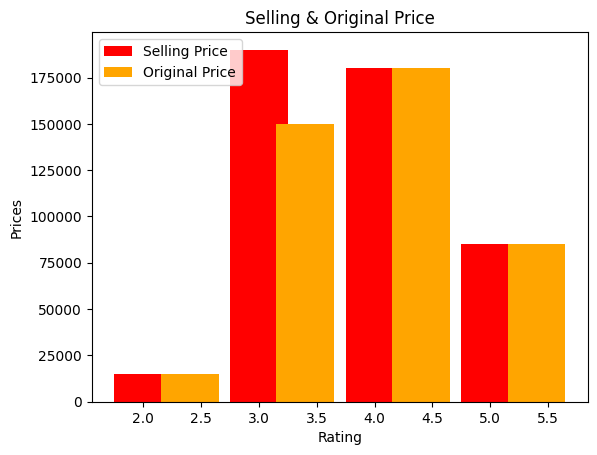

In [ ]:

plt.xlabel('Rating')
plt.ylabel('Prices')
plt.title('Selling & Original Price')
plt.bar(df['Rating'],df['Original Price'],label='Selling Price',color='r',width=0.5)
plt.bar(df['Rating']+0.4,df['Selling Price'],label='Original Price',color='orange',width=0.5)
plt.legend(loc='best')
plt.show()

In [ ]:
df['Storage'].unique()

array(['128 GB', '16 GB', '64 GB', '16 MB', '256 GB', '32 GB', '8 GB',
       '512 GB', '2 MB', '4 GB', 'Expandable Upto 16 GB', '64 MB',
       'Expandable Upto 32 GB', '4 MB', '128 MB', '1 TB', '512 MB',
       '129 GB', '256 MB', '153 MB', '130 GB', '8 MB', '10 MB', '100 MB',
       '140 MB'], dtype=object)

<Axes: xlabel='discount percentage', ylabel='Density'>

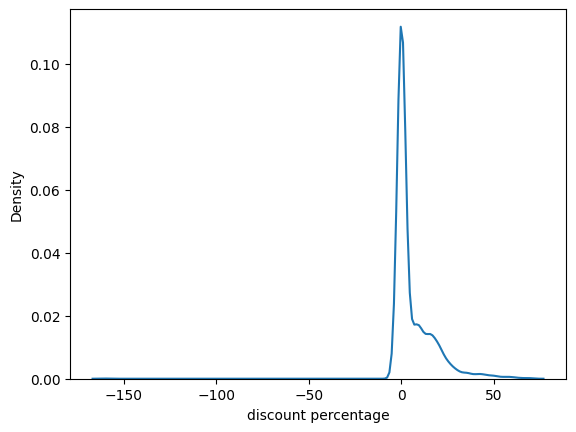

In [ ]:
sns.kdeplot(x=df['discount percentage'])

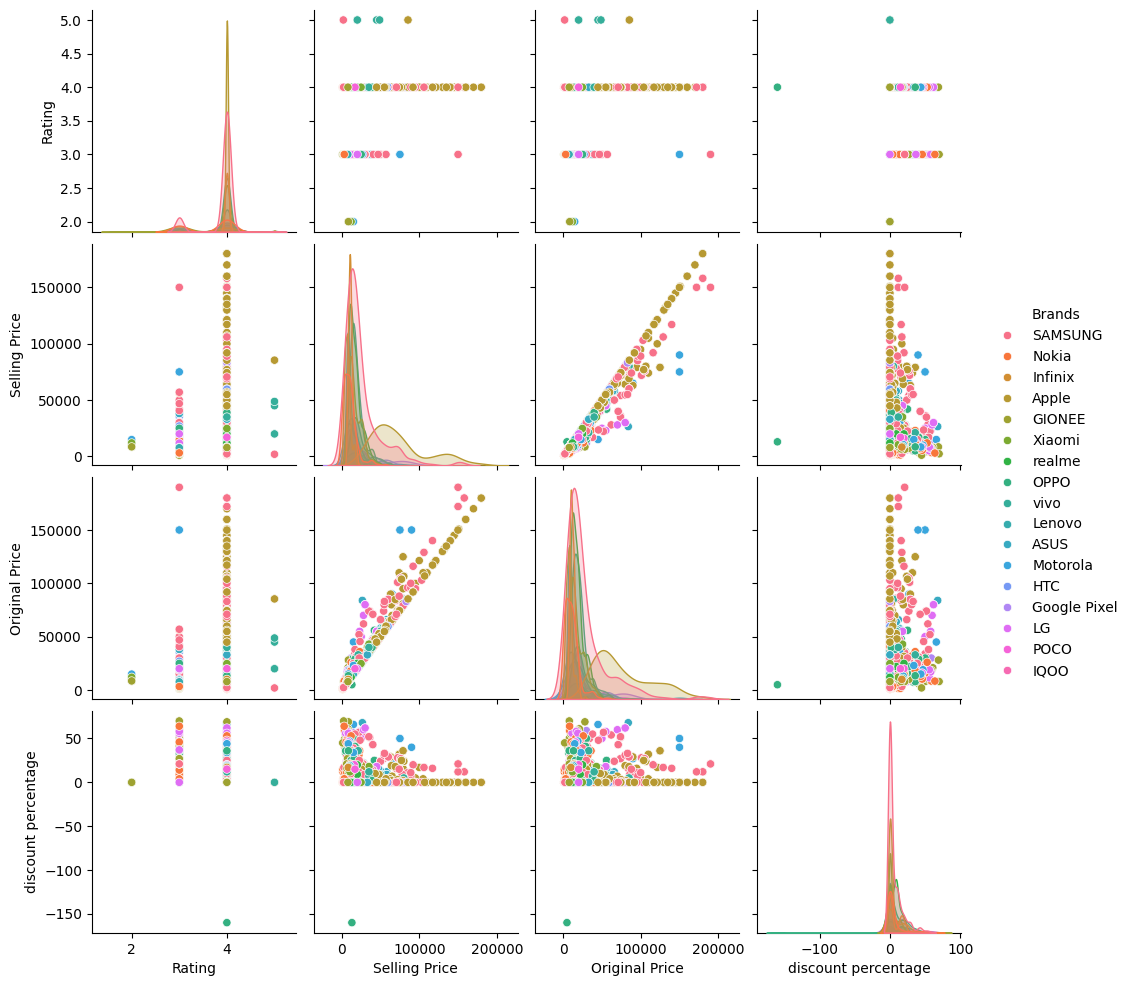

In [ ]:
sns.pairplot(df, hue='Brands')

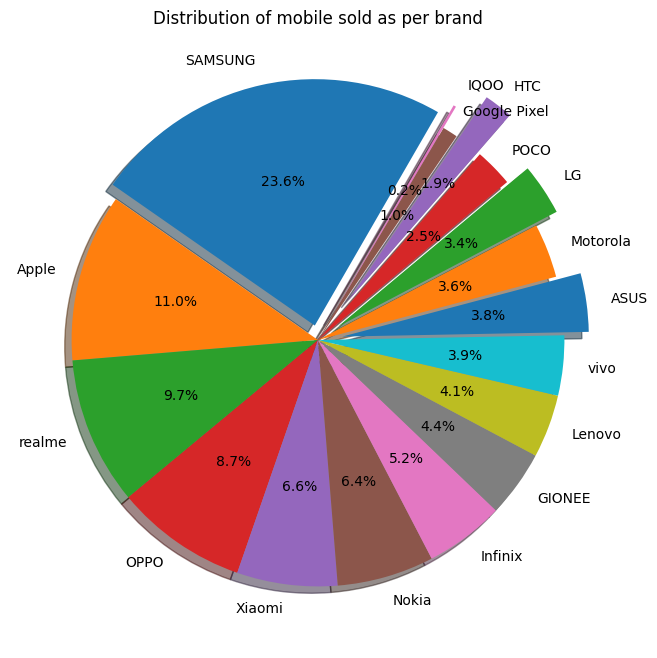

In [ ]:
Brand_counts = df['Brands'].value_counts()
Brand_counts
plt.figure(figsize=(15,8))
plt.title('Distribution of mobile sold as per brand')
plt.pie(Brand_counts, labels=Brand_counts.index,shadow=True, autopct='%1.1f%%', startangle=60,explode=(0.06,0,0,0,0,0,0,0,0,0,0.1,0,0.1,0,0.2,0,0.1))
plt.show()

Box plot:

<Axes: xlabel='Brands', ylabel='Selling Price'>

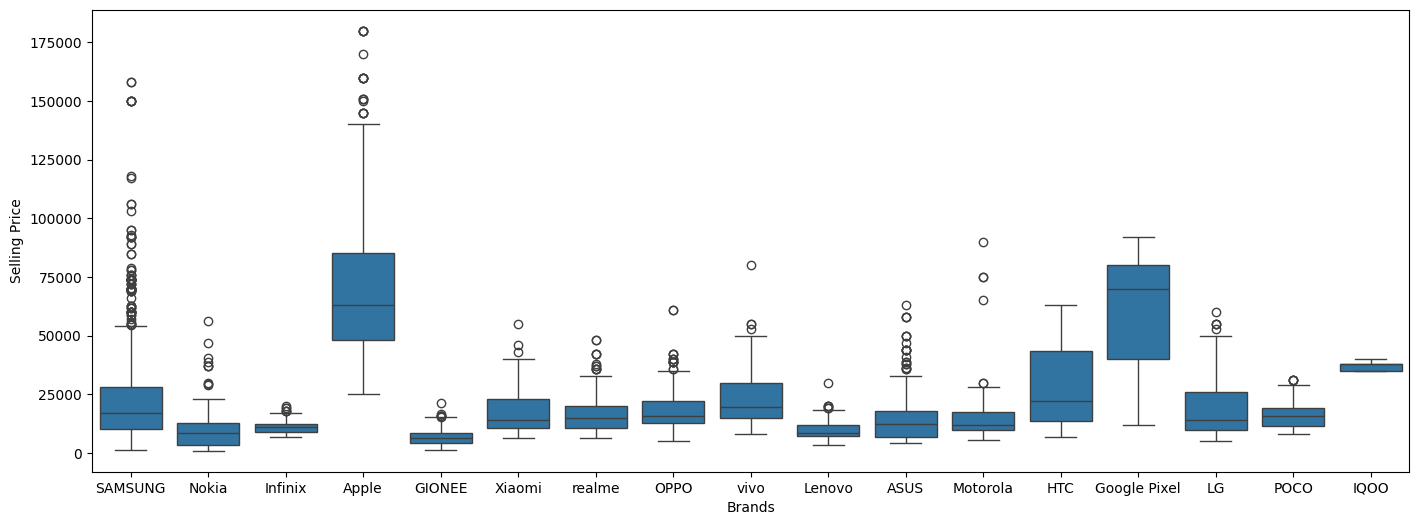

In [ ]:
plt.subplots(figsize=(17,6))
sns.boxplot(x="Brands", y="Selling Price", data=df)

Conclusion: From this above data analysis , we can understand that mostly chosen mobile brand is samsung , i phone , etc..and also mostly rated smartphones are vivo Z1x,vivo X60 Pro,Apple iPhone 7 Plus